<a href="https://colab.research.google.com/github/ISLAH-Hamza/deepIm/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import numpy as np
import scipy

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
valid=train=ImageDataGenerator(rescale=1/250)

In [130]:
data_train=train.flow_from_directory('/content/drive/MyDrive/training',target_size=(250,250), class_mode="binary")
data_valid=valid.flow_from_directory('/content/drive/MyDrive/validation',target_size=(250,250),class_mode="binary")

Found 1047 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [131]:
data_train.class_indices

{'cats': 0, 'dogs': 1}

In [132]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape= (250,250,3) ),
    tf.keras.layers.MaxPool2D(3,3),
     tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
]
)

In [133]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [134]:
early_stopping=EarlyStopping(monitor="val_accuracy",patience=5)

In [135]:
model_fit=model.fit(data_train,epochs=100,validation_data=data_valid,callbacks=[early_stopping])

Epoch 1/100
33/33 [==============================] - 5s 128ms/step - loss: 0.7180 - accuracy: 0.5320 - val_loss: 0.6782 - val_accuracy: 0.6420
Epoch 2/100
33/33 [==============================] - 4s 121ms/step - loss: 0.6765 - accuracy: 0.5654 - val_loss: 0.6714 - val_accuracy: 0.5227
Epoch 3/100
33/33 [==============================] - 4s 122ms/step - loss: 0.5955 - accuracy: 0.6734 - val_loss: 0.6326 - val_accuracy: 0.6875
Epoch 4/100
33/33 [==============================] - 4s 122ms/step - loss: 0.4772 - accuracy: 0.7736 - val_loss: 0.6250 - val_accuracy: 0.7102
Epoch 5/100
33/33 [==============================] - 4s 121ms/step - loss: 0.3324 - accuracy: 0.8730 - val_loss: 0.7936 - val_accuracy: 0.7216
Epoch 6/100
33/33 [==============================] - 4s 121ms/step - loss: 0.1803 - accuracy: 0.9322 - val_loss: 1.1456 - val_accuracy: 0.6761
Epoch 7/100
33/33 [==============================] - 4s 121ms/step - loss: 0.1142 - accuracy: 0.9618 - val_loss: 1.4091 - val_accuracy: 0.6534

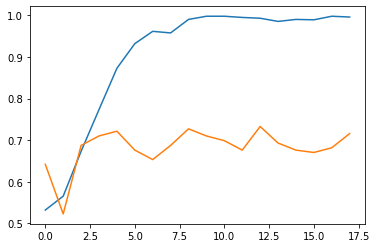

In [136]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.show()

save the model into the h5 format 

In [137]:
model.save("/content/drive/MyDrive/save models/model.hdf5")